In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

In [2]:
# Dependencies
import json

# Read JSONs
musicjson1 = "billboardMerged.json"
music_data = {}

# Sample 1 Data
with open(musicjson1) as data_file:
    music_data = json.load(data_file)

In [3]:
#test how we can grab what data from the json
music_data[0]['0'][2]

{'Acousticness': 0.869,
 'Artist': 'Frankie Avalon',
 'Danceability': 0.408,
 'Duration(ms)': 157718.0,
 'Energy': 0.213,
 'Followers': 38235,
 'Genres': ['adult standards',
  'brill building pop',
  'bubblegum pop',
  'christmas',
  'doo-wop',
  'rock-and-roll',
  'rockabilly'],
 'Key': 5,
 'KeySig': 'F Major',
 'Length': 2.628633333333333,
 'Mode': 1,
 'Popularity': 41,
 'Position': 2,
 'Song': 'Why',
 'Tempo': 94,
 'TimeSig': 4,
 'Track Name': 'Why',
 'Valence': 0.643,
 'Weeks on Chart': '7'}

In [4]:
#test how we can grab single/first genre from data 
music_data[0]['0'][2]

{'Acousticness': 0.869,
 'Artist': 'Frankie Avalon',
 'Danceability': 0.408,
 'Duration(ms)': 157718.0,
 'Energy': 0.213,
 'Followers': 38235,
 'Genres': ['adult standards',
  'brill building pop',
  'bubblegum pop',
  'christmas',
  'doo-wop',
  'rock-and-roll',
  'rockabilly'],
 'Key': 5,
 'KeySig': 'F Major',
 'Length': 2.628633333333333,
 'Mode': 1,
 'Popularity': 41,
 'Position': 2,
 'Song': 'Why',
 'Tempo': 94,
 'TimeSig': 4,
 'Track Name': 'Why',
 'Valence': 0.643,
 'Weeks on Chart': '7'}

In [5]:
columns_we_want = ['Week of', 'Song', 'Artist', 'Key', 'KeySig', 'Length', 'Mode', 'Tempo','Genre']
dict_of_lists = {"Week Of":[],
                "Song":[],
                "Artist":[],
                "Key":[],
                "Key Signature":[],
                "Length (Minutes)":[],
                "Mode":[],
                "Tempo":[],
                 "Genre":[]
                }

for date in music_data:
    current_week = date["0"][0]["Week of"]
    for i in range(1,len(date["0"])):
        dict_of_lists["Week Of"].append(current_week)
        dict_of_lists["Song"].append(date["0"][i]["Song"])
        dict_of_lists["Artist"].append(date["0"][i]["Artist"])
        
        #create exceptions so that if "Key" etc. does not exist, we just add str "Null" instead of break
        if("Key" in date["0"][i]):
            dict_of_lists["Key"].append(date["0"][i]["Key"])
        else:
            dict_of_lists["Key"].append("Null")
            
        if("KeySig" in date["0"][i]):
            dict_of_lists["Key Signature"].append(date["0"][i]["KeySig"])
        else:
            dict_of_lists["Key Signature"].append("Null")
            
        if("Length" in date["0"][i]):
            dict_of_lists["Length (Minutes)"].append(date["0"][i]["Length"])
        else:
            dict_of_lists["Length (Minutes)"].append("Null")

        if("Mode" in date["0"][i]):
            dict_of_lists["Mode"].append(date["0"][i]["Mode"])
        else:
            dict_of_lists["Mode"].append("Null")
            
        if("Tempo" in date["0"][i]):
            dict_of_lists["Tempo"].append(date["0"][i]["Tempo"])
        else:
            dict_of_lists["Tempo"].append("Null")
            
        #can't get this to just grab the first genre in the list of 'Genres' !!
        if("Genres" in date["0"][i]):
            dict_of_lists["Genre"].append(date["0"][i]["Genres"])
        else:
            dict_of_lists["Genre"].append("Null")

print(dict_of_lists)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [6]:
df = pd.DataFrame(dict_of_lists)
df

,Artist,Genre,Key,Key Signature,Length (Minutes),Mode,Song,Tempo,Week Of
0,Marty Robbins,"[country gospel, cowboy western, nashville sou...",2,D Major,4.32178,1,El Paso,106,"January 4, 1960"
1,Frankie Avalon,"[adult standards, brill building pop, bubblegu...",5,F Major,2.62863,1,Why,94,"January 4, 1960"
2,Miss Toni Fisher,[deep adult standards],0,C Major,2.23955,1,The Big Hurt,123,"January 4, 1960"
3,Johnny Preston,"[brill building pop, rhythm and blues, rock-an...",5,F Minor,2.63667,0,Running Bear,119,"January 4, 1960"
4,Freddie Cannon,Null,Null,Null,Null,Null,Way Down Yonder In New Orleans,Null,"January 4, 1960"
5,Guy Mitchell,"[adult standards, brill building pop, christma...",5,F Major,2.5716,1,Heartaches By The Number,172,"January 4, 1960"
6,Paul Anka,"[adult standards, brill building pop, canadian...",3,D# Major,2.42445,1,It's Time To Cry,109,"January 4, 1960"
7,Connie Francis,"[adult standards, brill building pop, christma...",9,A Major,2.52133,1,Among My Souvenirs,108,"January 4, 1960"
8,Steve Lawrence,"[adult standards, brill building pop, cabaret,...",5,F Major,1.90778,1,Pretty Blue Eyes,126,"January 4, 1960"
9,Jimmy Clanton,Null,Null,Null,Null,Null,"Go, Jimmy, Go",Null,"January 4, 1960"


In [7]:
#split Week Of column to separate Year column
df[['Week Of','Year']] = df['Week Of'].str.split(',',expand=True)
df

,Artist,Genre,Key,Key Signature,Length (Minutes),Mode,Song,Tempo,Week Of,Year
0,Marty Robbins,"[country gospel, cowboy western, nashville sou...",2,D Major,4.32178,1,El Paso,106,January 4,1960
1,Frankie Avalon,"[adult standards, brill building pop, bubblegu...",5,F Major,2.62863,1,Why,94,January 4,1960
2,Miss Toni Fisher,[deep adult standards],0,C Major,2.23955,1,The Big Hurt,123,January 4,1960
3,Johnny Preston,"[brill building pop, rhythm and blues, rock-an...",5,F Minor,2.63667,0,Running Bear,119,January 4,1960
4,Freddie Cannon,Null,Null,Null,Null,Null,Way Down Yonder In New Orleans,Null,January 4,1960
5,Guy Mitchell,"[adult standards, brill building pop, christma...",5,F Major,2.5716,1,Heartaches By The Number,172,January 4,1960
6,Paul Anka,"[adult standards, brill building pop, canadian...",3,D# Major,2.42445,1,It's Time To Cry,109,January 4,1960
7,Connie Francis,"[adult standards, brill building pop, christma...",9,A Major,2.52133,1,Among My Souvenirs,108,January 4,1960
8,Steve Lawrence,"[adult standards, brill building pop, cabaret,...",5,F Major,1.90778,1,Pretty Blue Eyes,126,January 4,1960
9,Jimmy Clanton,Null,Null,Null,Null,Null,"Go, Jimmy, Go",Null,January 4,1960


In [8]:
#drop any rows with 'Null' (string)
df = df.mask(df.eq('Null')).dropna()
# df = df.mask(df.eq('[]')).dropna()
df.head(25)

,Artist,Genre,Key,Key Signature,Length (Minutes),Mode,Song,Tempo,Week Of,Year
0,Marty Robbins,"[country gospel, cowboy western, nashville sou...",2,D Major,4.32178,1,El Paso,106,January 4,1960
1,Frankie Avalon,"[adult standards, brill building pop, bubblegu...",5,F Major,2.62863,1,Why,94,January 4,1960
2,Miss Toni Fisher,[deep adult standards],0,C Major,2.23955,1,The Big Hurt,123,January 4,1960
3,Johnny Preston,"[brill building pop, rhythm and blues, rock-an...",5,F Minor,2.63667,0,Running Bear,119,January 4,1960
5,Guy Mitchell,"[adult standards, brill building pop, christma...",5,F Major,2.5716,1,Heartaches By The Number,172,January 4,1960
6,Paul Anka,"[adult standards, brill building pop, canadian...",3,D# Major,2.42445,1,It's Time To Cry,109,January 4,1960
7,Connie Francis,"[adult standards, brill building pop, christma...",9,A Major,2.52133,1,Among My Souvenirs,108,January 4,1960
8,Steve Lawrence,"[adult standards, brill building pop, cabaret,...",5,F Major,1.90778,1,Pretty Blue Eyes,126,January 4,1960
10,Marty Robbins,"[country gospel, cowboy western, nashville sou...",2,D Major,4.32178,1,El Paso,106,January 11,1960
11,Frankie Avalon,"[adult standards, brill building pop, bubblegu...",5,F Major,2.62863,1,Why,94,January 11,1960


In [9]:
#make a column from Genre that is string instead of list
df['Genre_str'] = df.Genre.apply(lambda x: ', '.join([str(i) for i in x]))
df.head(30)

,Artist,Genre,Key,Key Signature,Length (Minutes),Mode,Song,Tempo,Week Of,Year,Genre_str
0,Marty Robbins,"[country gospel, cowboy western, nashville sou...",2,D Major,4.32178,1,El Paso,106,January 4,1960,"country gospel, cowboy western, nashville soun..."
1,Frankie Avalon,"[adult standards, brill building pop, bubblegu...",5,F Major,2.62863,1,Why,94,January 4,1960,"adult standards, brill building pop, bubblegum..."
2,Miss Toni Fisher,[deep adult standards],0,C Major,2.23955,1,The Big Hurt,123,January 4,1960,deep adult standards
3,Johnny Preston,"[brill building pop, rhythm and blues, rock-an...",5,F Minor,2.63667,0,Running Bear,119,January 4,1960,"brill building pop, rhythm and blues, rock-and..."
5,Guy Mitchell,"[adult standards, brill building pop, christma...",5,F Major,2.5716,1,Heartaches By The Number,172,January 4,1960,"adult standards, brill building pop, christmas..."
6,Paul Anka,"[adult standards, brill building pop, canadian...",3,D# Major,2.42445,1,It's Time To Cry,109,January 4,1960,"adult standards, brill building pop, canadian ..."
7,Connie Francis,"[adult standards, brill building pop, christma...",9,A Major,2.52133,1,Among My Souvenirs,108,January 4,1960,"adult standards, brill building pop, christmas..."
8,Steve Lawrence,"[adult standards, brill building pop, cabaret,...",5,F Major,1.90778,1,Pretty Blue Eyes,126,January 4,1960,"adult standards, brill building pop, cabaret, ..."
10,Marty Robbins,"[country gospel, cowboy western, nashville sou...",2,D Major,4.32178,1,El Paso,106,January 11,1960,"country gospel, cowboy western, nashville soun..."
11,Frankie Avalon,"[adult standards, brill building pop, bubblegu...",5,F Major,2.62863,1,Why,94,January 11,1960,"adult standards, brill building pop, bubblegum..."


In [10]:
#drop Genre column with lists, drop empty rows

df[df['Genre_str']==''] = np.nan
df = df.dropna(subset=['Genre_str'])
df.head(30)

,Artist,Genre,Key,Key Signature,Length (Minutes),Mode,Song,Tempo,Week Of,Year,Genre_str
0,Marty Robbins,"[country gospel, cowboy western, nashville sou...",2,D Major,4.32178,1,El Paso,106,January 4,1960,"country gospel, cowboy western, nashville soun..."
1,Frankie Avalon,"[adult standards, brill building pop, bubblegu...",5,F Major,2.62863,1,Why,94,January 4,1960,"adult standards, brill building pop, bubblegum..."
2,Miss Toni Fisher,[deep adult standards],0,C Major,2.23955,1,The Big Hurt,123,January 4,1960,deep adult standards
3,Johnny Preston,"[brill building pop, rhythm and blues, rock-an...",5,F Minor,2.63667,0,Running Bear,119,January 4,1960,"brill building pop, rhythm and blues, rock-and..."
5,Guy Mitchell,"[adult standards, brill building pop, christma...",5,F Major,2.5716,1,Heartaches By The Number,172,January 4,1960,"adult standards, brill building pop, christmas..."
6,Paul Anka,"[adult standards, brill building pop, canadian...",3,D# Major,2.42445,1,It's Time To Cry,109,January 4,1960,"adult standards, brill building pop, canadian ..."
7,Connie Francis,"[adult standards, brill building pop, christma...",9,A Major,2.52133,1,Among My Souvenirs,108,January 4,1960,"adult standards, brill building pop, christmas..."
8,Steve Lawrence,"[adult standards, brill building pop, cabaret,...",5,F Major,1.90778,1,Pretty Blue Eyes,126,January 4,1960,"adult standards, brill building pop, cabaret, ..."
10,Marty Robbins,"[country gospel, cowboy western, nashville sou...",2,D Major,4.32178,1,El Paso,106,January 11,1960,"country gospel, cowboy western, nashville soun..."
11,Frankie Avalon,"[adult standards, brill building pop, bubblegu...",5,F Major,2.62863,1,Why,94,January 11,1960,"adult standards, brill building pop, bubblegum..."


In [11]:
df = df.drop('Genre', 1)


In [12]:
df.head(30)

,Artist,Key,Key Signature,Length (Minutes),Mode,Song,Tempo,Week Of,Year,Genre_str
0,Marty Robbins,2,D Major,4.32178,1,El Paso,106,January 4,1960,"country gospel, cowboy western, nashville soun..."
1,Frankie Avalon,5,F Major,2.62863,1,Why,94,January 4,1960,"adult standards, brill building pop, bubblegum..."
2,Miss Toni Fisher,0,C Major,2.23955,1,The Big Hurt,123,January 4,1960,deep adult standards
3,Johnny Preston,5,F Minor,2.63667,0,Running Bear,119,January 4,1960,"brill building pop, rhythm and blues, rock-and..."
5,Guy Mitchell,5,F Major,2.5716,1,Heartaches By The Number,172,January 4,1960,"adult standards, brill building pop, christmas..."
6,Paul Anka,3,D# Major,2.42445,1,It's Time To Cry,109,January 4,1960,"adult standards, brill building pop, canadian ..."
7,Connie Francis,9,A Major,2.52133,1,Among My Souvenirs,108,January 4,1960,"adult standards, brill building pop, christmas..."
8,Steve Lawrence,5,F Major,1.90778,1,Pretty Blue Eyes,126,January 4,1960,"adult standards, brill building pop, cabaret, ..."
10,Marty Robbins,2,D Major,4.32178,1,El Paso,106,January 11,1960,"country gospel, cowboy western, nashville soun..."
11,Frankie Avalon,5,F Major,2.62863,1,Why,94,January 11,1960,"adult standards, brill building pop, bubblegum..."


In [13]:
genre_final = []

for index, row in df.iterrows():
    if("motown" in row["Genre_str"].lower()):
        genre_final.append("Motown")
    elif("disco" in row["Genre_str"].lower()):
        genre_final.append("Disco")
    elif("alternative rock" in row["Genre_str"].lower()):
        genre_final.append("Alt Rock")
    elif("rap" in row["Genre_str"].lower() or "hip hop" in row["Genre_str"].lower() or "urban"in row["Genre_str"].lower()):
        genre_final.append("Urban")
    elif("country" in row["Genre_str"].lower()):
        genre_final.append("Country")
    elif("metal" in row["Genre_str"].lower()):
        genre_final.append("Metal")
    elif("rhythm and blues" in row["Genre_str"].lower()):
        genre_final.append("R&B")
    elif("dance" in row["Genre_str"].lower()):
        genre_final.append("Dance")
    elif("rock" in row["Genre_str"].lower()):
        genre_final.append("Rock")
    elif("adult standards" in row["Genre_str"].lower()):
        genre_final.append("Adult Standards")
    elif("jazz" in row["Genre_str"].lower()):
        genre_final.append("Jazz")
    elif("pop" in row["Genre_str"].lower()):
        genre_final.append("Pop")
    else:
        genre_final.append("Other")
        
        
genre_df = df
genre_df["Primary Genre"] = pd.Series(genre_final).values
pd.set_option('display.max_colwidth', -1)

genre_df

,Artist,Key,Key Signature,Length (Minutes),Mode,Song,Tempo,Week Of,Year,Genre_str,Primary Genre
0,Marty Robbins,2,D Major,4.32178,1,El Paso,106,January 4,1960,"country gospel, cowboy western, nashville sound, outlaw country, traditional country",Country
1,Frankie Avalon,5,F Major,2.62863,1,Why,94,January 4,1960,"adult standards, brill building pop, bubblegum pop, christmas, doo-wop, rock-and-roll, rockabilly",Rock
2,Miss Toni Fisher,0,C Major,2.23955,1,The Big Hurt,123,January 4,1960,deep adult standards,Adult Standards
3,Johnny Preston,5,F Minor,2.63667,0,Running Bear,119,January 4,1960,"brill building pop, rhythm and blues, rock-and-roll, rockabilly",R&B
5,Guy Mitchell,5,F Major,2.5716,1,Heartaches By The Number,172,January 4,1960,"adult standards, brill building pop, christmas, deep adult standards, lounge, rock-and-roll, rockabilly",Rock
6,Paul Anka,3,D# Major,2.42445,1,It's Time To Cry,109,January 4,1960,"adult standards, brill building pop, canadian pop, christmas, easy listening, lounge, rock-and-roll, rockabilly",Rock
7,Connie Francis,9,A Major,2.52133,1,Among My Souvenirs,108,January 4,1960,"adult standards, brill building pop, christmas, doo-wop, easy listening, lounge, nashville sound, rock-and-roll, rockabilly",Rock
8,Steve Lawrence,5,F Major,1.90778,1,Pretty Blue Eyes,126,January 4,1960,"adult standards, brill building pop, cabaret, christmas, deep adult standards, easy listening, lounge",Adult Standards
10,Marty Robbins,2,D Major,4.32178,1,El Paso,106,January 11,1960,"country gospel, cowboy western, nashville sound, outlaw country, traditional country",Country
11,Frankie Avalon,5,F Major,2.62863,1,Why,94,January 11,1960,"adult standards, brill building pop, bubblegum pop, christmas, doo-wop, rock-and-roll, rockabilly",Rock


Primary Genre  Adult Standards  Alt Rock  Country  Dance  Disco  Jazz  Metal  \
Year                                                                           
 1960          15.0            NaN        24.0    NaN    NaN    NaN   NaN      
 1961          22.0            NaN        24.0    NaN    NaN    NaN   NaN      
 1962          36.0            NaN        14.0    NaN    NaN     1.0  NaN      
 1963          21.0            NaN        10.0    NaN    NaN    NaN   NaN      
 1964          8.0             NaN        5.0     NaN     5.0   NaN   NaN      
 1965          10.0            NaN        28.0     3.0   NaN     5.0  NaN      
 1966          13.0            NaN        3.0      6.0   NaN    NaN   NaN      
 1967          5.0             NaN       NaN       1.0   NaN     15.0 NaN      
 1968         NaN              NaN        14.0    NaN     5.0    26.0  3.0     
 1969          3.0             NaN        39.0    NaN     9.0    5.0  NaN      
 1970         NaN              NaN      

/Users/jessicawilbert/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


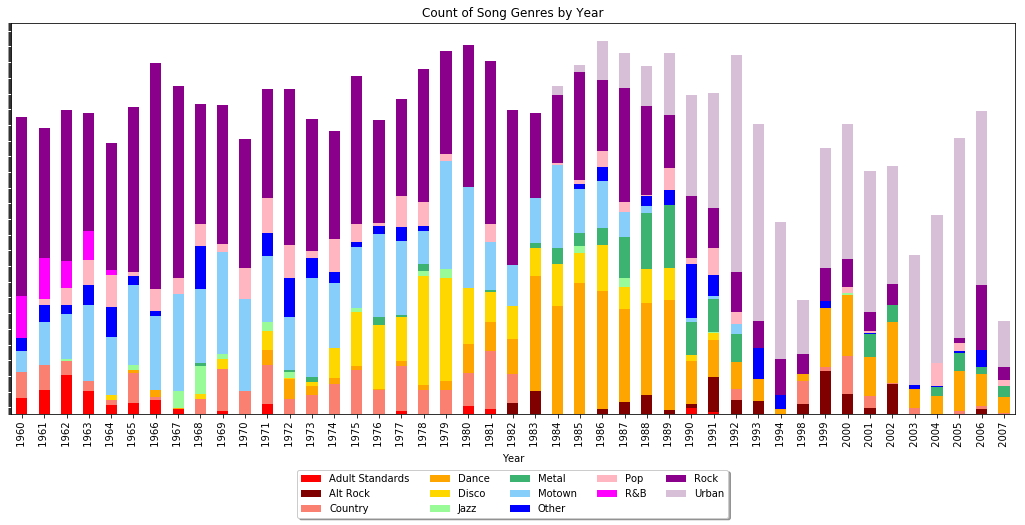

In [30]:
#create groupby by year
total_genres_per_year = df.groupby(["Year","Primary Genre"]).size().unstack()
print(total_genres_per_year)

colors = ['red', 'maroon', 'salmon', 'orange','gold', 'palegreen', 'mediumseagreen', 'lightskyblue', 'blue', 'lightpink', 'fuchsia', 'darkmagenta', 'thistle']

total_genres_per_year.plot(kind="bar", stacked=True, color=colors, figsize=(18,8))
ax = plt.subplot(111)
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.13),
          fancybox=True, shadow=True, ncol=5)
#set the y axis tick spacing to 1
tick_spacing = 1
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

#hide all x label nonsense
#ax.yaxis.set_visible(False)
ax.set_yticklabels([])
ax.yaxis.label.set_visible(False)

#title
plt.title("Count of Song Genres by Year")

# Save an image of our chart and print the final product to the screen
plt.savefig("genregroupedbar.png")
plt.show()



In [15]:
#linear regression
#create new df with year column and rock (count of  songs) column
#in order to create a model to predict rock songs over time

#print(total_genres_per_year)
rock_years = genre_df["Year"].unique()
#convert rock_years to int
rock_years = list(map(int, rock_years))

genre_df["Length (Minutes)"] = genre_df ['Length (Minutes)'].astype("float")
genre_df["Length (Minutes)"] = genre_df ['Length (Minutes)'].round(4)
genre_df["Tempo"] = genre_df ['Tempo'].astype("float")

rock = genre_df[genre_df["Primary Genre"]=="Rock"]
rock_groupby = rock.groupby("Year")
rock_totals_df = pd.DataFrame(rock_groupby["Song"].count())
rock_list = rock_totals_df["Song"].tolist()

motown = genre_df[genre_df["Primary Genre"]=="Motown"]
motown_groupby = motown.groupby("Year")
motown_totals_df = pd.DataFrame(motown_groupby["Song"].count())
motown_list = motown_totals_df["Song"].tolist()

length_groupby = genre_df.groupby("Year")
length_df = pd.DataFrame(length_groupby["Length (Minutes)"].mean())
length_list = length_df["Length (Minutes)"].tolist()
                  
tempo_groupby = genre_df.groupby("Year")
tempo_df = pd.DataFrame(tempo_groupby["Tempo"].mean())
tempo_list = tempo_df["Tempo"].tolist()

print(rock_years)
print(rock_list)
print(motown_list)
print(length_list)
print(tempo_list)

#print(type(rock_years))


#X = genre_df["Year"].unique()
#y = genre_df.groupby(["Year","Primary Genre"])["Artist"].count()


#X = list(map(int, X))

#print(X)
#print(y)



[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007]
[168, 122, 142, 111, 119, 154, 212, 180, 112, 130, 120, 102, 146, 123, 101, 138, 96, 91, 125, 97, 133, 152, 146, 80, 64, 101, 67, 107, 83, 50, 58, 38, 38, 25, 33, 19, 31, 26, 17, 20, 5, 61, 12]
[20, 40, 43, 71, 54, 75, 70, 91, 69, 96, 87, 62, 50, 92, 61, 57, 77, 69, 31, 101, 94, 45, 38, 42, 78, 42, 44, 23, 7, 4, 2, 9]
[2.603060791366904, 2.5745007462686558, 2.691624210526312, 2.561218085106386, 2.6382417322834613, 2.9597519163763053, 2.8813206686930077, 2.9680798045602574, 3.0671162068965536, 3.262191349480974, 3.5252747081712053, 3.3179388157894723, 3.411509539473687, 3.9005586956521756, 3.7910215094339637, 4.002773101265823, 4.749938545454542, 4.241240338983059, 4.170789164086681, 4.550972941176468, 4.208732173913045,

In [16]:
#make rock df
viz_df = pd.DataFrame(list(zip(rock_years, rock_list, motown_list, length_list, tempo_list)), columns=['Years','Rock Totals', 'Motown Totals', 'Song Length', 'Tempo'])
viz_df

,Years,Rock Totals,Motown Totals,Song Length,Tempo
0,1960,168,20,2.603061,115.571942
1,1961,122,40,2.574501,119.630597
2,1962,142,43,2.691624,111.982456
3,1963,111,71,2.561218,118.702128
4,1964,119,54,2.638242,123.952756
5,1965,154,75,2.959752,124.843206
6,1966,212,70,2.881321,121.136778
7,1967,180,91,2.968080,118.286645
8,1968,112,69,3.067116,114.013793
9,1969,130,96,3.262191,111.989619


In [17]:
# Reformat year data to start with 0
#pass in more than one feature
data_reformat = viz_df.values
X = data_reformat[:, 0]



In [18]:
#from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
#label_encoder = LabelEncoder()
#label_encoder.fit(X)
#encoded_X = label_encoder.transform(X)

In [19]:
#for label, original_year in zip(encoded_X, X):
    #print('Original Year: ' + str(original_year))
    #print('Encoded Label: ' + str(label))
    #print('-' * 12)

In [31]:
# Assign the data to X and y
# Note: Sklearn requires a 7 x 1 array of values
# so we use reshape to create this

X = X.reshape(-1, 1)
#y = viz_df["Tempo"].values.reshape(-1,1)
#y = viz_df["Song Length"].values.reshape(-1, 1)
y = viz_df["Rock Totals"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (32, 1) (32, 1)


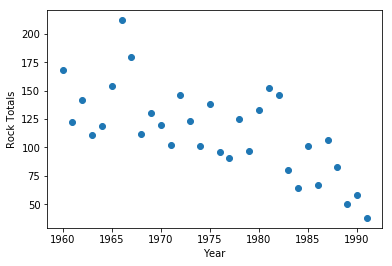

In [32]:
# Plot the data to see if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("Year")
plt.ylabel("Rock Totals")
#plt.ylabel("Song Length")
#plt.ylabel("Tempo")
plt.show()

In [33]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [34]:
# Create the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [35]:
X_train_shaped = X_train.reshape(-1,1)
X_test_shaped = X_test.reshape(-1,1)

In [36]:
# Fit the model to the trainig data. 
model.fit(X_train_shaped, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test_shaped)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 563.5220189063218
R-squared (R2 ): 0.4173977576569431
